# ORIE 4580/5580/5581 Assignment 4

#### Students: Gundeep Singh (gs722)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [425]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
%matplotlib inline
import numpy.matlib
from scipy import special
from scipy import linalg





---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.

$f(x) = \frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}$

For US Stokes, $P_1(x>0) = \int_{0}^{\inf} dx f(x) = 0.71226 $

For US Bonds, $P_2(x>0) = \int_{0}^{\inf} dx f(x) =  0.758036 $

For EM Bonds, $P_3(x>0) = \int_{0}^{\inf} dx f(x) =  0.703099  $

Prob that all three financial products simultaneously yield a positive return:
$P= P_1*P_2*P_3 = 0.379616 $


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [427]:
mean = [0.14, 0.07, 0.16]
cov = [[0.0625 , -0.01, 0.0375],
       [-0.01, 0.01, -0.015],
       [0.0375, -0.015, 0.09]]

N = 100000
L_1 = linalg.cholesky(cov, lower=True)
trialnumber=100

proballthreepos = np.zeros(trialnumber)
for t in range(trialnumber):
    X = np.random.normal(size =N),np.random.normal(size =N),np.random.normal(size =N);
    Y_1 = np.dot(L_1,X)+np.matlib.repmat(mean,N,1).T
    proballthreepos[t] = np.sum((Y_1[0]>0) & (Y_1[1]>0) & (Y_1[2]>0))/N

mean_pos_diff_trials = np.mean(proballthreepos)
ci_pos_diff_trials = 2*np.std(proballthreepos)/np.sqrt(trialnumber)  

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(Y_1[0],Y_1[1],Y_1[2], s=6)
#ax.set_title(r"Samples of $Y=\mu+LX$, $L=$Cholesky($\Sigma$)")

print('Probability that all three products simulatneously yield a positive return = ' +repr(mean_pos_diff_trials) + '+/-' +repr(ci_pos_diff_trials))

Probability that all three products simulatneously yield a positive return = 0.3699787+/-0.00031703724134555546


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.

$[\alpha,\beta] = [-\frac{\sqrt{12}}{2},\frac{\sqrt{12}}{2} ]$

In [166]:
u=np.random.rand(1000000)
a=-np.sqrt(12)/2
b=np.sqrt(12)/2
y=u*(b-a) +a
np.mean(y),np.var(y)

(0.0015643679452286704, 1.0005953828761613)

In [167]:
u=np.random.rand(1000000)
x1 = u*(b-a) +a
u=np.random.rand(1000000)
x2 = u*(b-a) +a

In [168]:
np.mean(x1*x2)

-0.00012087444914987309

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.
$\mathbb{E}[V_2] = (1-p)\mathbb{E}[X1] + p\mathbb{E}[X2]  $

$\mathbb{E}[V_2] = 0*(1-p) + 0*p = 0 $

$Var(V_2) = \mathbb{E}[V_2^2] - (\mathbb{E}[V_2])^2 = \mathbb{E}[V_2^2] $

$Var(V_2) = (1-p) \mathbb{E}[X_1^2] + p \mathbb{E}[X_2^2] = 1$

Therefore, $\mathbb{E}[V_2] = 0 $, $Var(V_2) =1$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.
$Cov(V_1, V_2) = \mathbb{E}[V_1 V_2] -\mathbb{E}[V_1]\mathbb{E}[V_2] $

$Cov(V_1, V_2) = \mathbb{E}[V_1 V_2] $

$Cov(V_1, V_2) = (1-p) \mathbb{E}[X_1^2] + p \mathbb{E}[X_1 X_2] $

Since, $X_1$ and $X_2$ are independent r.v., $\mathbb{E}[X_1 X_2]=0$. 

$Cov(V_1, V_2) = (1-p)  $

Therefore, $ p = 1- \sigma_{12}$ gives the desired the correlation

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

In [169]:
def correlateddist(N,sig12):
    """
    Generate two correlated uniform random variables V_1, V_2 such that 
    E[V_1]=E[V_2]=0, Var(V_1)=Var(V_2)=1 

    Parameters:
    N (int): Number of samples needed for each
    sig12 (between [0,1]): Correlation value

    Returns:
    V1, V2 = generated random samples with the given correlated value
    """
    a=-np.sqrt(12)/2
    b=np.sqrt(12)/2
    u=np.random.rand(N)
    x1 = u*(b-a) +a
    u=np.random.rand(N)
    x2 = u*(b-a) +a
    p=1-sig12
    V1 =x1
    u=np.random.rand(N)
    V2 = np.zeros(N)
    V2[u<=p] =  x2[u<=p] # select x2 w prob p
    V2[u>p]  =  x1[u>p]  # select x1 w prob (1-p)
    
    return V1,V2
    

In [170]:
N=100000
sig12=0
V = correlateddist(N,0.4)

Text(0.5, 1.0, 'Scatter plot with $\\sigma_{12}=$1')

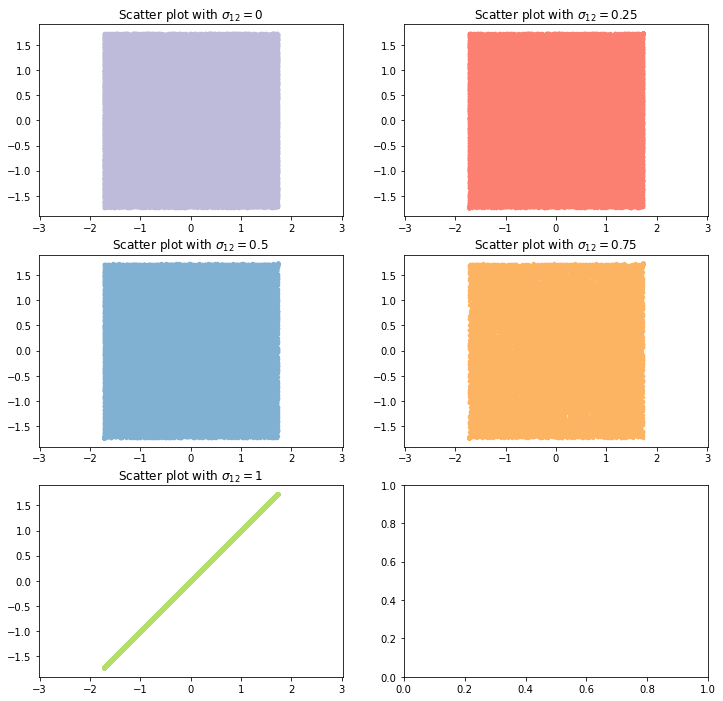

In [171]:
cmap=plt.get_cmap('Set3')
fig, axes = plt.subplots(3, 2, figsize=(12,12))

N=100000
sig12=0
V0= correlateddist(N,sig12)
axes[0,0].scatter(V0[0],V0[1],s=6,color=cmap(2)); axes[0,0].axis('equal')
axes[0,0].set_title(r"Scatter plot with $\sigma_{12}=$"+str(sig12))

sig12=0.25
V025 = correlateddist(N,sig12)
axes[0,1].scatter(V025[0],V025[1],s=6,color=cmap(3)); axes[0,1].axis('equal')
axes[0,1].set_title(r"Scatter plot with $\sigma_{12}=$"+str(sig12))

sig12=0.5
V05 = correlateddist(N,sig12)
axes[1,0].scatter(V05[0],V05[1],s=6,color=cmap(4)); axes[1,0].axis('equal')
axes[1,0].set_title(r"Scatter plot with $\sigma_{12}=$"+str(sig12))

sig12=0.75
V075 = correlateddist(N,sig12)
axes[1,1].scatter(V075[0],V075[1],s=6,color=cmap(5)); axes[1,1].axis('equal')
axes[1,1].set_title(r"Scatter plot with $\sigma_{12}=$"+str(sig12))

sig12=1
V1 = correlateddist(N,sig12)
axes[2,0].scatter(V1[0],V1[1],s=6,color=cmap(6)); axes[2,0].axis('equal')
axes[2,0].set_title(r"Scatter plot with $\sigma_{12}=$"+str(sig12))

In [172]:
np.mean(V075[0]),np.var(V075[0]),np.mean(V075[0]*V075[1])

(-0.0014136362213445484, 1.0007211228874227, 0.7494297475668645)

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [179]:
N=100000
sig12=0.5
V05 = correlateddist(N,sig12)
print('Probability that both V1 and V2 default = ' +repr(np.sum((V05[0]<0) & (V05[1]<0)) /N))

Probability that both V1 and V2 default = 0.37403


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.3 \\
		0.3 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


In [428]:
N=10000
mean =[0,0];
cov = [[1,0.3],
       [0.3,1]]
Z1 , Z2 = np.random.multivariate_normal(mean, cov, N).T

u = (1/2*(1 + special.erf(-Z1/np.sqrt(2))))
a=-np.sqrt(12)/2
b=np.sqrt(12)/2
w_i=u*(b-a) +a
np.mean(w_i),np.var(w_i)

(-0.0008883571221469168, 0.9970494537127439)

Hence, $W_1$, $W_2$ are uniform on $[\alpha,\beta] = [-\frac{\sqrt{12}}{2},\frac{\sqrt{12}}{2}] $ 

since, $\mathbb{E}[W_i]=0$ and $Var(W_i)=1$)

Probability that neither V1 nor V2 default = 0.3313


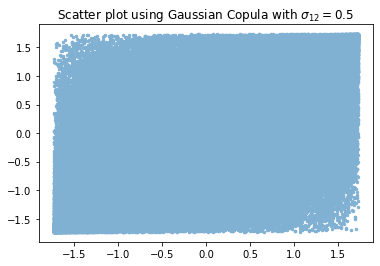

In [177]:
def gausscopula(N, sig12):
    mean =[0,0];
    cov = [[1,sig12],
           [sig12,1]]
    Z1 , Z2 = np.random.multivariate_normal(mean, cov, N).T

    u = (1/2*(1 + special.erf(-Z1/np.sqrt(2))))
    a=-np.sqrt(12)/2
    b=np.sqrt(12)/2
    W1=u*(b-a) +a
    
    u = (1/2*(1 + special.erf(-Z2/np.sqrt(2))))
    W2=u*(b-a) +a
    return W1,W2

N=100000
sig12=0.5
W12 = gausscopula(N,sig12)

plt.scatter(W12[0],W12[1],s=6,color=cmap(4)); 
plt.title(r"Scatter plot using Gaussian Copula with $\sigma_{12}=$"+str(sig12))

print('Probability that neither V1 nor V2 default = ' +repr(np.sum((W12[0]>=0) & (W12[1]>=0)) /N))

In [178]:
print('Probability that both V1 and V2 default = ' +repr(np.sum((W12[0]<0) & (W12[1]<0)) /N))

Probability that both V1 and V2 default = 0.33483


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

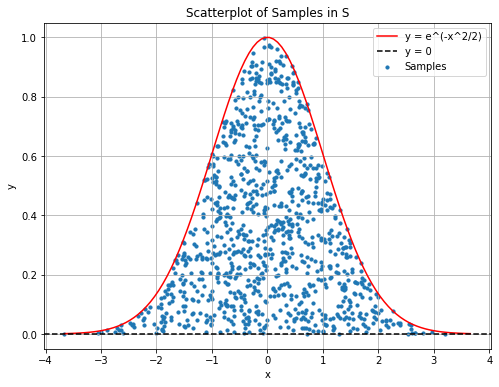

In [234]:
n=1000
x_val = np.random.normal(0,1,n)
y_val = np.random.rand(n)*np.exp(-x_val**2/2)
# Plot the samples and the lines y=0 and y=e^(-x^2/2)
plt.figure(figsize=(8, 6))
plt.scatter(x_val, y_val, marker='o', s=10, label='Samples')
x_max =max(abs(x_val))
x_values = np.linspace(-x_max, x_max, 100)
y_values = np.exp(-x_values**2/2)
plt.plot(x_values, y_values, 'r-', label='y = e^(-x^2/2)')
plt.axhline(0, color='k', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Samples in S')
plt.legend()
plt.grid(True)
plt.show()


___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

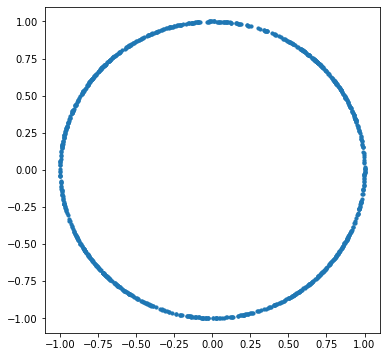

In [254]:
n=1000
u = 2*np.random.rand(n)-1
v= 2*np.random.rand(n)-1

x = u/np.sqrt(u**2+v**2)
y = v/np.sqrt(u**2+v**2)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', s=10, label='Samples')


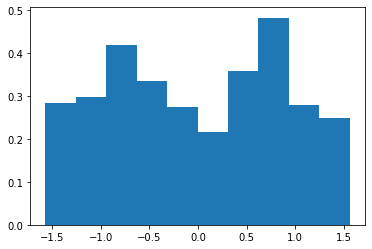

In [255]:
plt.hist(np.arctan(y/x), bins=10, density=True);

^ NOT uniformly scattered!

## Ans.



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

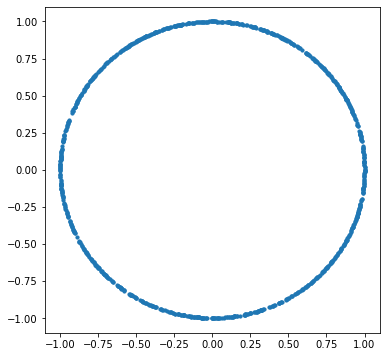

In [250]:
n=1000
z = np.random.normal(0,1,n)
w= np.random.normal(0,1,n)

x = z/np.sqrt(z**2+w**2)
y = w/np.sqrt(z**2+w**2)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', s=10, label='Samples')


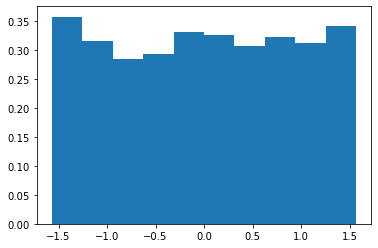

In [251]:
plt.hist(np.arctan(y/x), bins=10, density=True);

This time we are able to generate points uniformly distributed on the circumference.

EXPLANATION: Points uniformly distributed on the circumference, We want the combined probability density $g(x,y) = f(x)*f(y)$ to be radially symmetric. 

In the second case (sampling from a Gaussian): $g(x,y) \propto e^{-(x^2+y^2)} = e^{-r^2}$ is radially symmetric!

However, in the first case (sampling from a Uniform): $g(x,y) \propto x*y$, which is not spherically symmetric. In this case, there are clearly be more points along the diagonal x=y (where theta =pi/4 or ~ 0.78 radian) as observed in the histogram above!

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [268]:
n=10000
p_arrival_t = 1000*np.random.rand(n)
p_arrival_t = np.sort(p_arrival_t)
np.mean(p_arrival_t)

503.93745521600897

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [353]:
n=10000

trialnumber = 100
mean_passenger_wait_time =np.zeros(trialnumber)

for trial in range(trialnumber):
    p_arrival_t = 1000*np.random.rand(n)
    p_arrival_t = np.sort(p_arrival_t)
    bins_edge = np.arange(0,1000+10,10)
    passenger_no_on_each_train = np.histogram(p_arrival_t, bins=bins_edge)[0]
    passenger_wait_time = np.mod(p_arrival_t,10)
    mean_passenger_wait_time[trial] = np.mean(passenger_wait_time)


        
mean_wait_diff_trials = np.mean(mean_passenger_wait_time)
ci_wait_diff_trials = 2*np.std(mean_passenger_wait_time)/np.sqrt(trialnumber)  


In [354]:
print('expected waiting time: ' + repr(mean_wait_diff_trials) + '+/-' + repr(ci_wait_diff_trials))

expected waiting time: 4.9975612229874224+/-0.00634085713765333


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [384]:
n=10000

trialnumber = 1000
mean_passenger_wait_time =np.zeros(trialnumber)

for trial in range(trialnumber):
    p_arrival_t = 1000*np.random.rand(n)
    p_arrival_t = np.sort(p_arrival_t)
    trial_arrival_times = np.cumsum(np.random.exponential(10,1100))
    arrind = np.where(trial_arrival_times>1e3)[0][0]
    bins_edge = np.concatenate((np.array([0]), trial_arrival_times[:arrind+1]))
    passenger_no_on_each_train = np.histogram(p_arrival_t, bins=bins_edge)[0]
    train_time_each_passenger = np.repeat(trial_arrival_times[:arrind+1],passenger_no_on_each_train)
    waiting_time_each_passenger =  train_time_each_passenger -p_arrival_t
    mean_passenger_wait_time[trial] = np.mean(waiting_time_each_passenger)

        
mean_wait_diff_trials = np.mean(mean_passenger_wait_time)
ci_wait_diff_trials = 2*np.std(mean_passenger_wait_time)/np.sqrt(trialnumber)  

In [385]:
print('expected waiting time: ' + repr(mean_wait_diff_trials) + '+/-' + repr(ci_wait_diff_trials))

expected waiting time: 9.947261905460772+/-0.09204706275129183


In [432]:
(1-np.exp(1))/np.exp(1)

-0.6321205588285577

___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [418]:
trialnumber = 1000
mean_inter_arrival_times =np.zeros(trialnumber)

for trial in range(trialnumber):
    trial_arrival_times = np.cumsum(np.random.exponential(10,1100))
    mean_inter_arrival_times[trial] = np.mean(np.diff(trial_arrival_times))
          
mean_inter_arrival_times_trials = np.mean(mean_inter_arrival_times)
ci_mean_inter_arrival_times_trials = 2*np.std(mean_inter_arrival_times)/np.sqrt(trialnumber)      

In [419]:
print('Inter-arrival times: ' + repr(mean_inter_arrival_times_trials) + '+/-' + repr(ci_mean_inter_arrival_times_trials))

Inter-arrival times: 10.001434633807781+/-0.018629793454163775


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [409]:
n=10000

trialnumber = 1000
mean_inter_arrival_time_each_passenger_equal =np.zeros(trialnumber)

for trial in range(trialnumber):
    p_arrival_t = 1000*np.random.rand(n)
    p_arrival_t = np.sort(p_arrival_t)
    bins_edge = np.arange(0,1000+10,10)
    passenger_no_on_each_train = np.histogram(p_arrival_t, bins=bins_edge)[0]
    passenger_wait_time = np.mod(p_arrival_t,10)
    train_time_each_passenger = np.repeat(bins_edge[1:],passenger_no_on_each_train)
    prev_train_time_each_passenger = np.repeat(bins_edge[:-1],passenger_no_on_each_train)
    inter_arrival_time_each_passenger = train_time_each_passenger - prev_train_time_each_passenger
    mean_inter_arrival_time_each_passenger_equal[trial] = np.mean(inter_arrival_time_each_passenger)

mean_inter_arrival_time_diff_trials_equal = np.mean(mean_inter_arrival_time_each_passenger_equal)
ci_inter_arrival_time_diff_trials_equal = 2*np.std(mean_inter_arrival_time_each_passenger_equal)/np.sqrt(trialnumber)  


In [433]:
n=10000

trialnumber = 1000
mean_inter_arrival_time_each_passenger_exp =np.zeros(trialnumber)

for trial in range(trialnumber):
    p_arrival_t = 1000*np.random.rand(n)
    p_arrival_t = np.sort(p_arrival_t)
    trial_arrival_times = np.cumsum(np.random.exponential(10,1100))
    arrind = np.where(trial_arrival_times>1e3)[0][0]
    bins_edge = np.concatenate((np.array([0]), trial_arrival_times[:arrind+1]))
    passenger_no_on_each_train = np.histogram(p_arrival_t, bins=bins_edge)[0]
    train_time_each_passenger = np.repeat(trial_arrival_times[:arrind+1],passenger_no_on_each_train)
    prev_train_time_each_passenger = np.repeat(bins_edge[:-1],passenger_no_on_each_train)
    inter_arrival_time_each_passenger = train_time_each_passenger - prev_train_time_each_passenger
    waiting_time_each_passenger =  train_time_each_passenger -p_arrival_t
    mean_inter_arrival_time_each_passenger_exp[trial] = np.mean(inter_arrival_time_each_passenger)

        
mean_inter_arrival_time_diff_trials_exp = np.mean(mean_inter_arrival_time_each_passenger_exp)
ci_inter_arrival_time_diff_trials_exp = 2*np.std(mean_inter_arrival_time_each_passenger_exp)/np.sqrt(trialnumber)  


In [435]:
np.mean(inter_arrival_time_each_passenger)

19.580254447112775

In [416]:
print('Inter-arrival Time Case A: ' + repr(mean_inter_arrival_time_diff_trials_equal) + '+/-' + repr(ci_inter_arrival_time_diff_trials_equal))

Inter-arrival Time Case A: 10.0+/-0.0


In [415]:
print('Inter-arrival Time Case B: ' + repr(mean_inter_arrival_time_diff_trials_exp) + '+/-' + repr(ci_inter_arrival_time_diff_trials_exp))

Inter-arrival Time Case B: 19.87657798137024+/-0.17923599533645324


The inter-arrival time for each passenger is double the expected wait time. This makes sense as we are choosing a random uniform variable between the bounds of inter-arrival time. 

Explanation: 

Average inter-train time is 10 min for both cases (a) and (b)
However, since the process is 'memoryless' in the case of an exponential distribution, the time it takes for the next train to arrive when a passesnger gets there follows an exponential distribution. Hence, the mean of the waiting time experienced by a passenger on average is 10 min. While in the deterministic case, the mean was 5 min. 


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  